# Workplace

#Analyzed insurance claims dataset using Python, focusing on cleaning, trends, fraud detection, and ML.
#Trello board link: https://trello.com/b/Qf5PRILS/remote-team-hub
#Github link: https://github.com/Nafeesa-21/Workplace

##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data pre-processing

In [ ]:
df=pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
pd=df.dropna()
pd

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
numeric_df = df.select_dtypes(include=['number'])
df.fillna(numeric_df.mean(),inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##Data Visualization


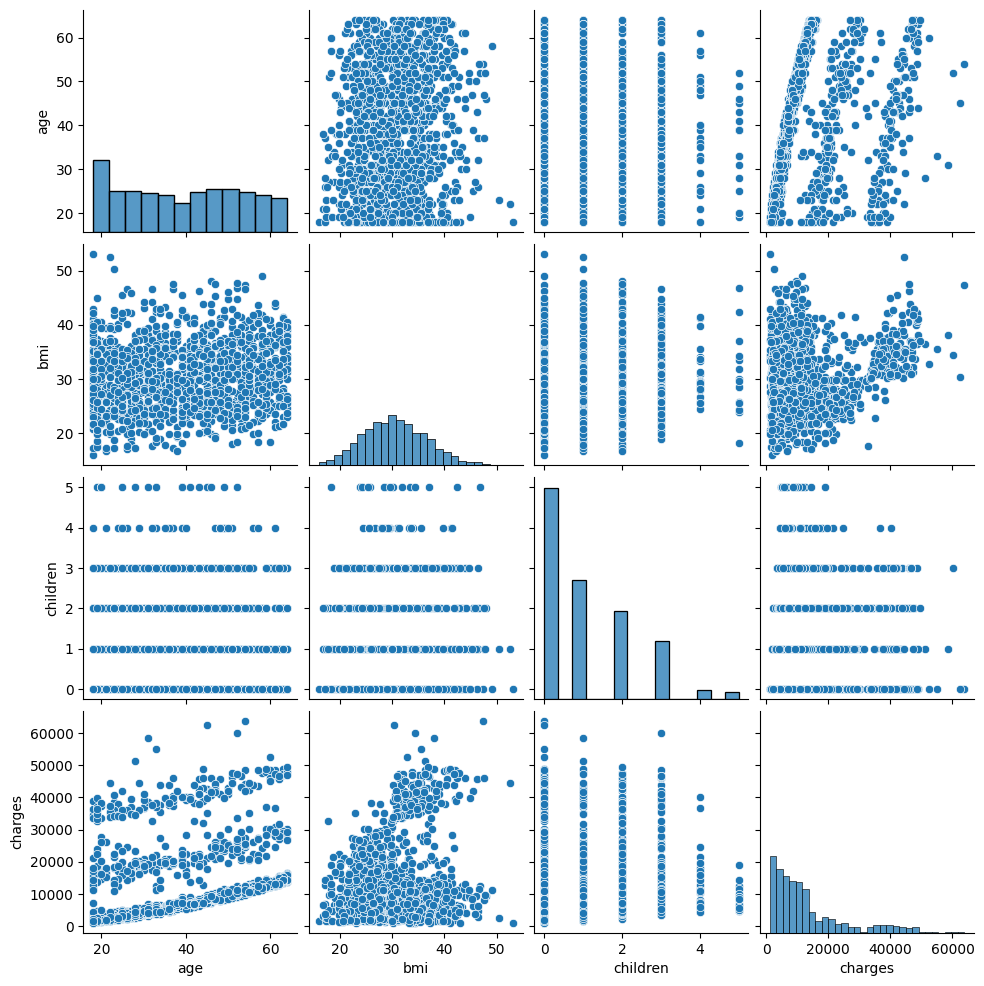

In [ ]:
sns.pairplot(df)

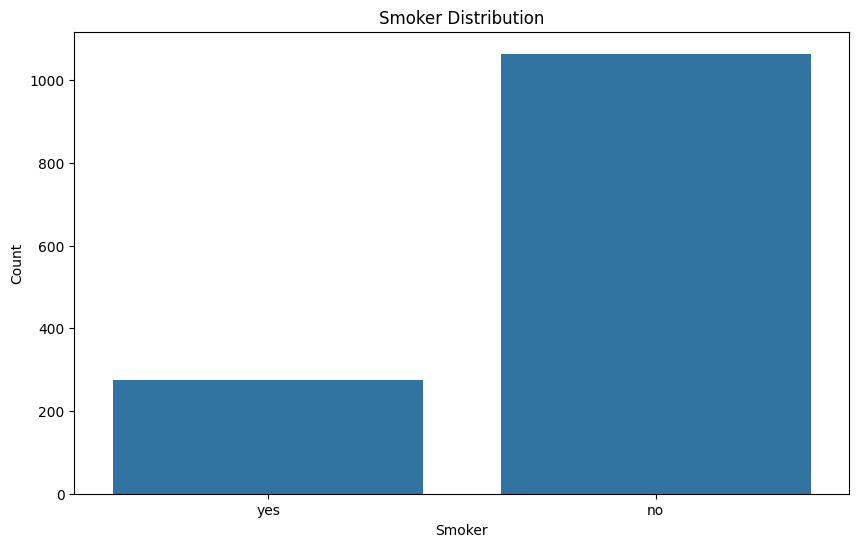

In [ ]:
# prompt: bar graph

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


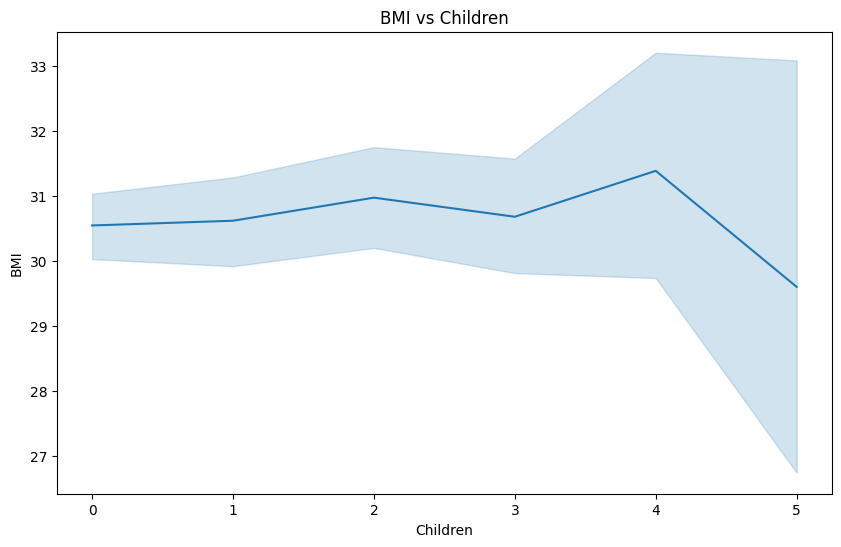

In [ ]:
# prompt: bmi vs children line graph

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.lineplot(x='children', y='bmi', data=df)
plt.title('BMI vs Children')
plt.xlabel('Children')
plt.ylabel('BMI')
plt.show()


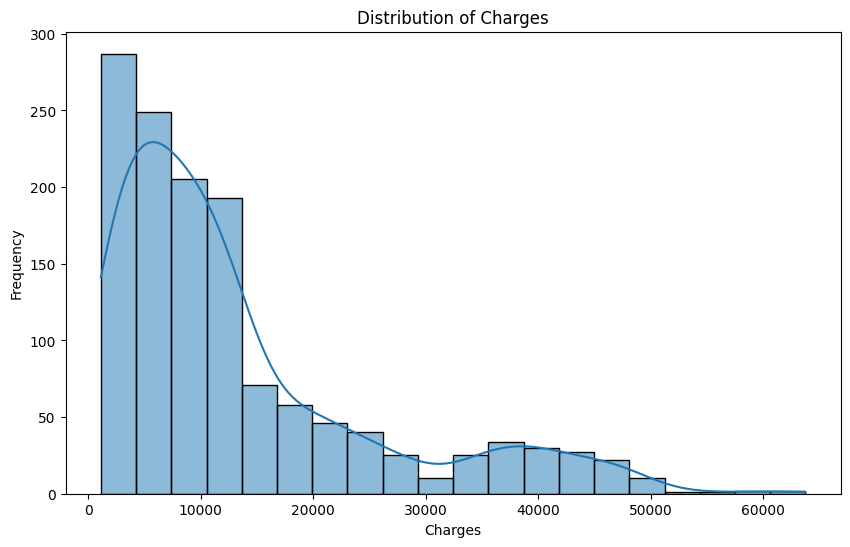

In [ ]:
# prompt: graph

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=20, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# prompt: fit model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Separate features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 33596915.85136145
R-squared: 0.7835929767120724


In [ ]:
# prompt: evaluation metrics

# Calculate other evaluation metrics
from sklearn.metrics import mean_absolute_error, median_absolute_error

mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Median Absolute Error: {medae}")

# You can also calculate other metrics like:
# - Explained Variance Score
# - Root Mean Squared Error (RMSE)
# - Max Error

# Example for RMSE:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4181.19447375365
Median Absolute Error: 2695.139463039106
Root Mean Squared Error: 5796.284659276273


In [ ]:
# prompt: sklearn

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Create and train a Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree - Mean Squared Error: {mse_dt}")
print(f"Decision Tree - R-squared: {r2_dt}")

# Create and train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

# Create and train a Support Vector Machine (SVR) model
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR - Mean Squared Error: {mse_svr}")
print(f"SVR - R-squared: {r2_svr}")

Decision Tree - Mean Squared Error: 42446908.010150984
Decision Tree - R-squared: 0.7265877305258355
Random Forest - Mean Squared Error: 20942520.922619622
Random Forest - R-squared: 0.8651034329144947
SVR - Mean Squared Error: 166492259.9106511
SVR - R-squared: -0.07242267496062205


In [ ]:
# prompt: machine learning graph

from sklearn import tree
import graphviz

# Assuming you have already trained your dt_model (DecisionTreeRegressor)

# Export the decision tree in DOT format
dot_data = tree.export_graphviz(dt_model, out_file=None,
                                feature_names=X.columns,
                                class_names=['charges'],
                                filled=True, rounded=True,
                                special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Display the graph (optional, it will show the graph inline in Colab)
graph

# Or save the graph to a file
# graph.render("decision_tree")